In [580]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from  sklearn import metrics

In [581]:
bankdepo1 = pd.read_csv('bank-full.csv')

In [582]:
bankdepo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [583]:
bankdepo2 = bankdepo1.drop('contact', axis = 1)

In [584]:
#Checking to see if there are any null values in the dataset

In [585]:
bankdepo2.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [586]:
bankdepo2.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [587]:
bankdepo2.groupby(['job']).count()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
job,,,,,,,,,,,,,,,
admin.,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171
blue-collar,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732
entrepreneur,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
housemaid,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
management,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458
retired,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264
self-employed,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
services,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


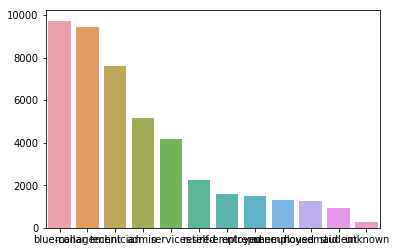

In [588]:
job_count = bankdepo2['job'].value_counts()
sns.barplot(job_count.index,job_count.values, alpha=0.9)

In [589]:
bankdepo2.groupby(['marital']).count()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
marital,,,,,,,,,,,,,,,
divorced,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207,5207
married,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214,27214
single,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790,12790


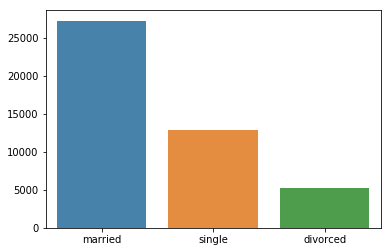

In [590]:
marital_count = bankdepo2['marital'].value_counts()
sns.barplot(marital_count.index,marital_count.values,alpha=0.9)

In [591]:
#From the box plot of the 

In [592]:
bankdepo2.groupby(['education']).count()

,age,job,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
education,,,,,,,,,,,,,,,
primary,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851,6851
secondary,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202,23202
tertiary,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301,13301
unknown,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857


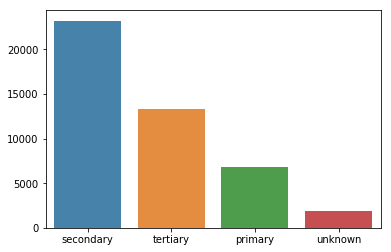

In [593]:
education_count = bankdepo2['education'].value_counts()
sns.barplot(education_count.index,education_count.values, alpha=0.9)

In [594]:
bankdepo2.groupby(['default']).count()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
default,,,,,,,,,,,,,,,
no,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396,44396
yes,815,815,815,815,815,815,815,815,815,815,815,815,815,815,815


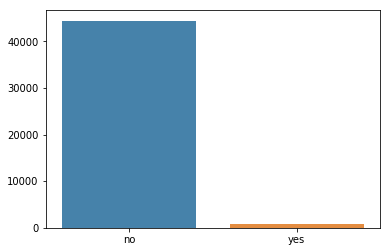

In [595]:
default_count = bankdepo2['default'].value_counts()
sns.barplot(default_count.index,default_count.values, alpha=0.9)

In [596]:
bankdepo2.groupby(['housing']).count()

,age,job,marital,education,default,balance,loan,day,month,duration,campaign,pdays,previous,poutcome,Target
housing,,,,,,,,,,,,,,,
no,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081,20081
yes,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130,25130


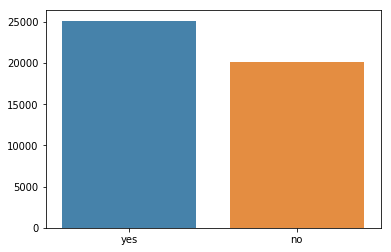

In [597]:
housing_count = bankdepo2['housing'].value_counts()
sns.barplot(housing_count.index,housing_count.values, alpha=0.9)

In [598]:
bankdepo2.groupby(['loan']).count()

,age,job,marital,education,default,balance,housing,day,month,duration,campaign,pdays,previous,poutcome,Target
loan,,,,,,,,,,,,,,,
no,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967,37967
yes,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244,7244


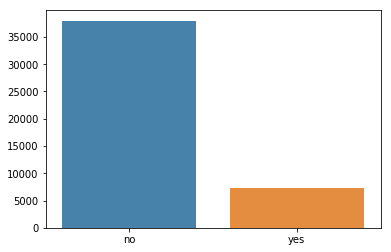

In [599]:
loan_count = bankdepo2['loan'].value_counts()
sns.barplot(loan_count.index,loan_count.values, alpha=0.9)

In [600]:
bankdepo2.groupby(['month']).count()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target
month,,,,,,,,,,,,,,,
apr,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932,2932
aug,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247,6247
dec,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
feb,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649,2649
jan,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
jul,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895,6895
jun,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341,5341
mar,477,477,477,477,477,477,477,477,477,477,477,477,477,477,477
may,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766,13766


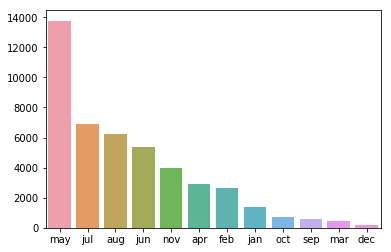

In [601]:
month_count = bankdepo2['month'].value_counts()
sns.barplot(month_count.index,month_count.values, alpha=0.9)

In [602]:
bankdepo2.groupby(['poutcome']).count()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,Target
poutcome,,,,,,,,,,,,,,,
failure,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901,4901
other,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840,1840
success,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511,1511
unknown,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959,36959


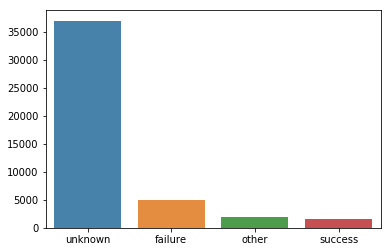

In [603]:
poutcome_count = bankdepo2['poutcome'].value_counts()
sns.barplot(poutcome_count.index,poutcome_count.values, alpha=0.9)

In [604]:
bankdepo2.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


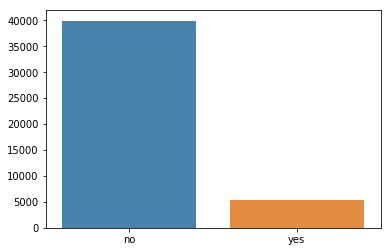

In [605]:
target_count = bankdepo2['Target'].value_counts()
sns.barplot(target_count.index,target_count.values, alpha=0.9)

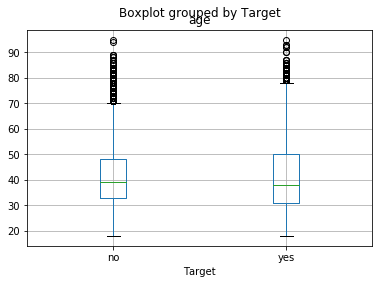

In [606]:
bankdepo2.boxplot('age','Target')

In [607]:
# From the boxplot for the target variable as a function of age we see that the distribtion of people who
#subscribed to the term deposit is wider than the people who did not subscribe with lesser outliers.

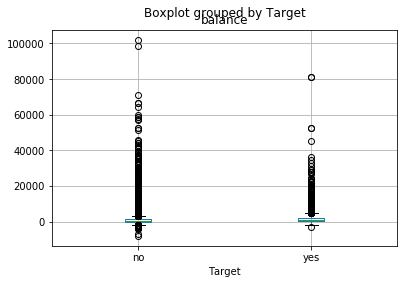

In [608]:
bankdepo2.boxplot('balance','Target')

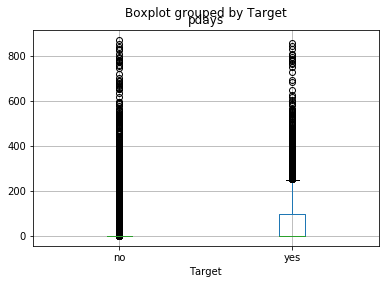

In [609]:
bankdepo2.boxplot('pdays', 'Target')

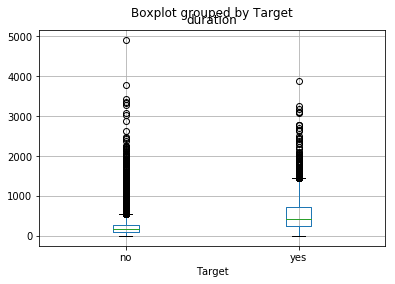

In [610]:
bankdepo2.boxplot('duration','Target')

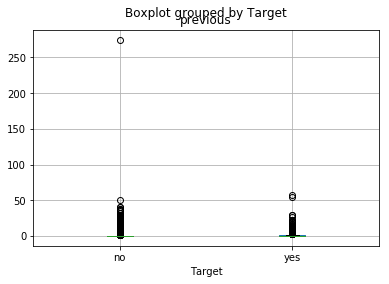

In [611]:
bankdepo2.boxplot('previous','Target')

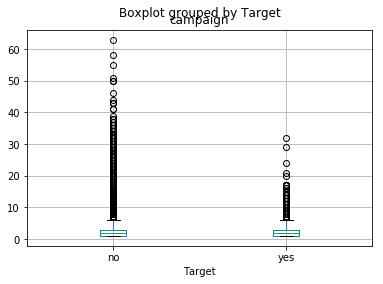

In [612]:
bankdepo2.boxplot('campaign','Target')

In [613]:
#bankdepo3 = bankdepo2

In [614]:
#for feature in bankdepo3.columns: # Loop through all columns in the dataframe
 #   if bankdepo3[feature].dtype == 'object': # Only apply for columns with categorical strings
  #      bankdepo3[feature] = pd.Categorical(bankdepo3[feature]).codes

In [615]:
#bankdepo3.info()

In [616]:
#the contact number has no role in the target attribute so we drop it

In [617]:
bankdepo4 = bankdepo1.drop('contact', axis = 1)
bankdepo4 = bankdepo4.drop('month', axis = 1)

In [618]:
print(bankdepo4['job'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [619]:
#Instead of using the hot encoding which goes in alphabetical order we go with our own encoding because
#here we see that a person who has a manaement job is more likely to subscribe to a term depsit than a person who is
# unemployed or a person with a blue collar job so we choose to give more weightage to people who are retired, 
# managers, entreprenuers, and so on. Same with marital status, education. In marital ststus we give more 
# weightage to people who are married because married people tend to save money, similarly more your education level is
# genrally more ones salary level is so they tend to subscribe to term deposit so we give higher weightage to those 
# people.

In [620]:
replace_job = {'job': {'unemployed':0, 'unknown': 1, 'housemaid': 2, 'student': 3,
                                  'retired': 4, 'blue-collar': 5, 'technician': 6 , 'admin.': 7 ,
                       'self-employed': 8,'services': 9,'management': 10,'entrepreneur':11}}

In [621]:
bankdepo4.replace(replace_job,inplace = True)

In [622]:
replace_marital = {'marital': {'single': 0, 'divorced': 1, 'married':2}}

In [623]:
bankdepo4.replace(replace_marital,inplace = True)

In [624]:
replace_education = {'education': {'unknown':0 , 'primary': 1, 'secondary':2, 'tertiary':3}}

In [625]:
bankdepo4.replace(replace_education, inplace= True)

In [626]:
bankdepo4.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target
0,58,10,2,3,no,2143,yes,no,5,261,1,-1,0,unknown,no
1,44,6,0,2,no,29,yes,no,5,151,1,-1,0,unknown,no
2,33,11,2,2,no,2,yes,yes,5,76,1,-1,0,unknown,no
3,47,5,2,0,no,1506,yes,no,5,92,1,-1,0,unknown,no
4,33,1,0,0,no,1,no,no,5,198,1,-1,0,unknown,no


In [627]:
replace_default = {'default': {'yes': 1, 'no': 0}}

In [628]:
bankdepo4.replace(replace_default, inplace= True)

In [629]:
bankdepo4.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target
0,58,10,2,3,0,2143,yes,no,5,261,1,-1,0,unknown,no
1,44,6,0,2,0,29,yes,no,5,151,1,-1,0,unknown,no
2,33,11,2,2,0,2,yes,yes,5,76,1,-1,0,unknown,no
3,47,5,2,0,0,1506,yes,no,5,92,1,-1,0,unknown,no
4,33,1,0,0,0,1,no,no,5,198,1,-1,0,unknown,no


In [630]:
replace_housing = {'housing': {'yes': 1, 'no': 0}}


In [631]:
bankdepo4.replace(replace_housing, inplace= True)

In [632]:
#bankdepo4.head()

In [633]:
replace_loan = {'loan': {'yes': 1, 'no': 0}}
bankdepo4.replace(replace_loan, inplace= True)

In [634]:
bankdepo4.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target
0,58,10,2,3,0,2143,1,0,5,261,1,-1,0,unknown,no
1,44,6,0,2,0,29,1,0,5,151,1,-1,0,unknown,no
2,33,11,2,2,0,2,1,1,5,76,1,-1,0,unknown,no
3,47,5,2,0,0,1506,1,0,5,92,1,-1,0,unknown,no
4,33,1,0,0,0,1,0,0,5,198,1,-1,0,unknown,no


In [635]:
replace_poutcome = {'poutcome': {'success': 2, 'failure': 0, 'unknown':1,'other':1}}
bankdepo4.replace(replace_poutcome, inplace= True)

In [636]:
bankdepo4.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target
0,58,10,2,3,0,2143,1,0,5,261,1,-1,0,1,no
1,44,6,0,2,0,29,1,0,5,151,1,-1,0,1,no
2,33,11,2,2,0,2,1,1,5,76,1,-1,0,1,no
3,47,5,2,0,0,1506,1,0,5,92,1,-1,0,1,no
4,33,1,0,0,0,1,0,0,5,198,1,-1,0,1,no


In [637]:
replace_target = {'Target': {'yes': 1, 'no': 0}}
bankdepo4.replace(replace_target, inplace= True)

In [638]:
bankdepo4.head()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,Target
0,58,10,2,3,0,2143,1,0,5,261,1,-1,0,1,0
1,44,6,0,2,0,29,1,0,5,151,1,-1,0,1,0
2,33,11,2,2,0,2,1,1,5,76,1,-1,0,1,0
3,47,5,2,0,0,1506,1,0,5,92,1,-1,0,1,0
4,33,1,0,0,0,1,0,0,5,198,1,-1,0,1,0


In [639]:
bankdepo4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,6.768972,2.626242,0.0,5.0,6.0,9.0,11.0
marital,45211.0,1.319037,0.884908,0.0,0.0,2.0,2.0,2.0
education,45211.0,2.060516,0.778704,0.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0


In [640]:
bankdepo4.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [641]:
# There seems to be a huge bias in the data towards no for the target i.e there are a huge number of people who
# did not take the loan where as the people who got the loan is only 5280 .The ratio of people who got the loan to people 
# who did not get the loan is 7.5 whisis huge. So there will a big bias twards people who did not get the loan 
# towards no for the target.

In [642]:
#sns.pairplot(bankdepo4, diag_kind = 'kde')

In [647]:
X = bankdepo4.iloc[:,0:14]
y = bankdepo4.iloc[:,14]

In [648]:
test_size1 = 0.30
seed1 = 1
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = test_size1, random_state = seed1)

In [649]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [663]:
#We use logistic regression because there is too much bias in the data set towards no for the Target so 
# a decision tree will be a bad model for such a data set so we try the logistic regression.

In [650]:
modelog1 = LogisticRegression()
modelog1.fit(X_train_scaled, y_train)
y_predict1 = modelog1.predict(X_test)
modelscore1 = modelog1.score(X_test_scaled, y_test) 
print(modelscore1)

0.8977440283102329


C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [652]:
cm1 = metrics.confusion_matrix(y_test, y_predict1)
print(cm1)

[[   55 11958]
 [    0  1551]]


In [664]:
print(metrics.classification_report(y_test, y_predict1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.01     12013
           1       0.11      1.00      0.21      1551

   micro avg       0.12      0.12      0.12     13564
   macro avg       0.56      0.50      0.11     13564
weighted avg       0.90      0.12      0.03     13564



In [665]:
#As expected the precision to determine the true negative is high because of the bias in the data. 
# This can be overcome by including randomly selected data which has positive for the term depsosit from 
# the Target attribute.

In [653]:
# Here we have accuratly predited that 55 people have not suscribed for the term deposit (True Negative) but 11958 
#have been inaccuratly predicted as if they have subscribed to the term deposit when they actually did not 
#(False positive).1551 people have been accuratly predicted that they have got the term depost with the bank 
#(True Positive) and there are 0 False Negative. The high number of False ositive came into picture because there is 
# a huge bias in the data towards people who did not subscribe to the term deposit. so
# because of this bias we cannot guess if a customer will get a loan from this bank or not with good precision 
# using our model. One way is to use the bootstarp method of randomly selecting some target value which 
# turned out to be yes in the Target column randomly form the existing dataset. This may increase the 
# yes to no ratio for the Target column.
# We can see if we can still improve the score and reduce the false positive and 
# the False negative numbers in the confusion matrix by performing bagging and boosting method on the data set.

In [655]:
#Using the bagging method on the logistic regression to improve the test score

In [670]:
from sklearn.ensemble import BaggingClassifier
logbgcl = BaggingClassifier(n_estimators = 100, max_samples = 0.50, oob_score = True)
logbgcl = logbgcl.fit(bankdepo4, y)
print(logbgcl.oob_score_)

1.0


In [671]:
#Using the Adaboost method on the logistic regression

In [672]:
from sklearn.ensemble import AdaBoostClassifier
adaboost1 = AdaBoostClassifier(base_estimator = modelog1, n_estimators = 50)
adaboost1 = adaboost1.fit(X_train, y_train)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SONY\Anaconda3\New folder\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed

In [675]:
adaboost_predict1 = adaboost1.predict(X_test)
adaboost1.score(X_test, y_test)

0.8908876437629017

In [677]:
print(metrics.classification_report(y_test,adaboost_predict1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.60      0.14      0.23      1551

   micro avg       0.89      0.89      0.89     13564
   macro avg       0.75      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



In [678]:
#Here the precsion to determine if aperson is going to subscribe to term depsosit has improved compared to a single 
# logistic model

In [674]:
#Using the Gradient boosting method for the logistic regression

In [679]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth = 5)
gbc1 = gbc1.fit(X_train, y_train)

In [680]:
gbc1_predict1 = gbc1.predict(X_test)
gbc1.score(X_test, y_test)

0.903273370687113

In [681]:
print(metrics.classification_report(y_test,gbc1_predict1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.39      0.48      1551

   micro avg       0.90      0.90      0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [682]:
#the precision to determine if aperson is going to subsribe to term deposit has improved still ore in gradient boosting
# thus proving that the ensemble models improve the precsion of a model.

In [720]:
# Cross validating the model

In [721]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(gbc1,X_train, y_train, cv = 10, scoring = 'roc_auc')
print(cv_scores)

[0.8997307  0.89455651 0.89732611 0.8940708  0.91458747 0.89356689
 0.90574794 0.90655842 0.90228646 0.90159801]


In [706]:
from sklearn.model_selection import GridSearchCV

In [722]:
tuned_param = {"base_estimator_criterion":["gini","entropy"], "base_estimator_splitter":["best","random"],
               "n_estimators" :[10,100]}

In [723]:
grid_search_ada = GridSearchCV(adaboost1,param_grid = tuned_param, scoring = 'roc_auc')

In [724]:
print(grid_search_ada.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [725]:
print(grid_search_ada.best_param_)

AttributeError: 'GridSearchCV' object has no attribute 'best_param_'